In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv( r'E:\OneDrive - University of Georgia\Project\Data\tweet_data_2_food\4.3 FourColumns 3+1csv - Copy\fastFood_2019_2021_localTime_stateLevel_4_columns.csv',low_memory=False)

#only local_time column
df1 =df["local_time"]
df1.to_csv(r"for_counts.csv",index=True,sep=',')

In [26]:
# Import customs module to tokenize and clean tweet dataset
data_dir = r'for_counts.csv'
tweets_df = pd.read_csv(data_dir) 
tweets_df

,Unnamed: 0,local_time
0,0,2022-01-19T23:57:35
1,1,2022-01-19T23:11:02
2,2,2022-01-19T23:23:09
3,3,2022-01-19T22:06:54
4,4,2022-01-19T23:53:57
...,...,...
1317278,1317278,2020-01-20T19:05:10
1317279,1317279,2020-01-20T16:04:42
1317280,1317280,2020-01-20T18:02:57
1317281,1317281,2020-01-20T18:02:47


In [27]:
# Convert date to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['local_time'], errors='coerce')

# Add column for year
#tweets_df['year'] = tweets_df['date'].dt.year

# View tweet density over time
monthly_counts = tweets_df.set_index('date').resample('M').count()
#yearly_counts = tweets_df.set_index('date').resample('A').count()

daily_counts = tweets_df.set_index('date').resample('D').count()
daily_counts

,Unnamed: 0,local_time
date,,
2019-01-20,1434,1434
2019-01-21,1583,1583
2019-01-22,1841,1841
2019-01-23,1990,1990
2019-01-24,2426,2426
...,...,...
2022-01-15,451,451
2022-01-16,385,385
2022-01-17,388,388


In [28]:
daily_counts.to_csv(r"daily_counts.csv",index=True,sep=',')
monthly_counts.to_csv(r"monthly_counts.csv",index=True,sep=',')

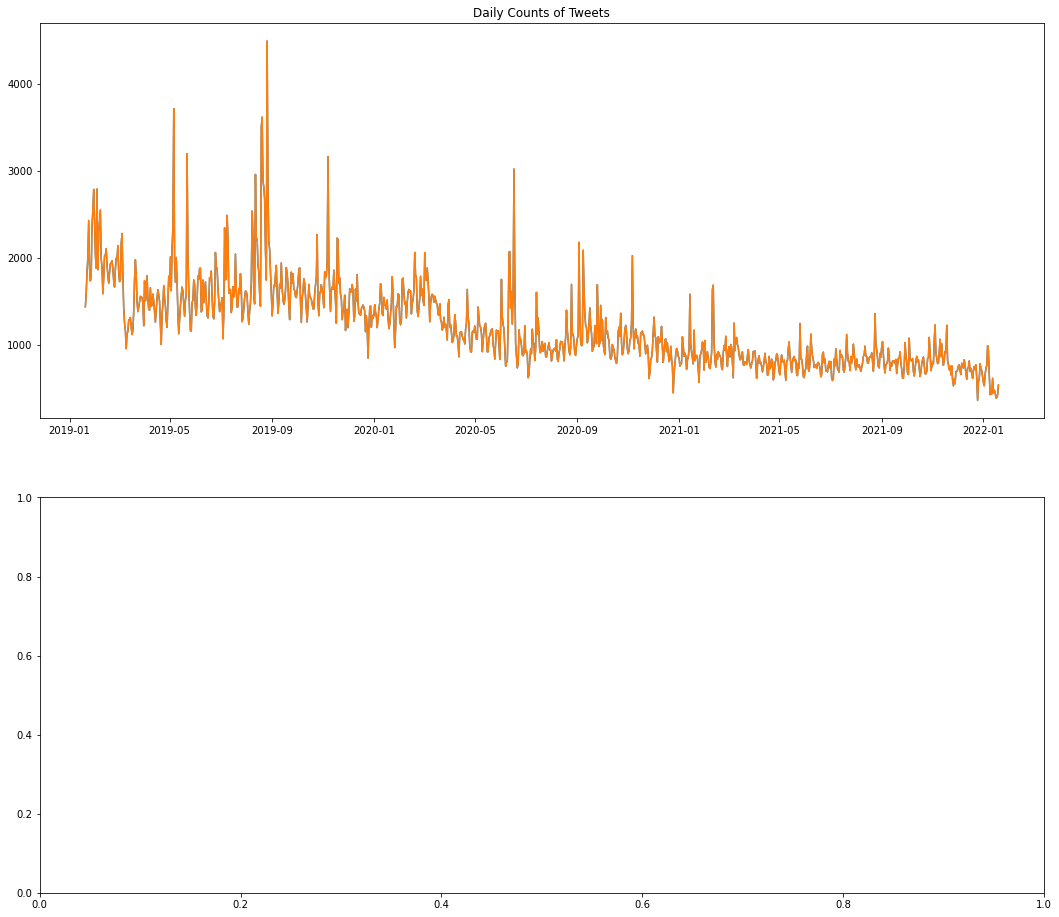

In [29]:

fig, ax = plt.subplots(2, figsize=(18,16))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts of Tweets');

plt.show()
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
# ax[2].plot(yearly_counts);
# ax[2].set_title('Yearly Counts');
# plt.show()

# Total tweet count per day
The counts API endpoint[https://github.com/DocNow/twarc/issues/583] requires a query. So no, this isn't possible, unless you can search for something that can act as a proxy for the overall traffic. Feel free to join us in Slack[https://docs.google.com/forms/d/e/1FAIpQLSf3E7PAXPoT-XoedpEy9UCTpDPS8kPj5JkMwpaWbuqVP0bTrQ/viewform] if you want to trade ideas or chat about things.  
  
It’s not really possible to get this - any kind of workaround will involve a lot of guesswork. You can’t really restrict things to US based on the geo filters because too few tweets have geo enabled, and the search won’t let you specify “no query”. But this figure is relatively easy to get, calling the counts endpoint using twarc for example:

In [2]:
import twarc

In [3]:
!twarc2 counts --granularity day  "place_country:US" --text


👋  Hi I don't see a configuration file yet, so let's make one.

Please follow these steps:

1. visit https://developer.twitter.com/en/portal/
2. create a project and an app
3. go to your Keys and Tokens and generate your keys

Please enter your Bearer Token (leave blank to skip to API key configuration): ^C

Aborted!


In [ ]:
!twarc2 counts --granularity day --archive --start-time "2019-02-27" --end-time "2022-01-02" \
"(obesity OR #obesity OR obese OR overweight OR #overweight OR fat OR (gain weight) OR bmi OR #bmi) lang:en place_country:US -from:username" --text

In [ ]:
!twarc2 counts "weather lang:en place_country:US" --csv --granularity day --archive --start-time "2019-01-20" --end-time "2022-01-20" > granularity_day_count.csv

In [31]:
#US geotaged
!twarc2 counts --archive --csv --start-time "2019-01-20" --end-time "2022-01-20" --granularity day "place_country:US" > granularity_day_count.csv

In [ ]:
!twarc2 counts --archive --text --start-time "2018-12-28" --end-time "2022-01-02" --granularity day "place_country:US"

In [ ]:
!twarc2 counts "weather lang:en place_country:US" --csv --granularity day --archive --start-time "2019-01-20" --end-time "2022-01-20" > granularity_day_count.csv

In [3]:
!twarc2 counts "(McDonald's OR McDonalds OR Starbucks OR Starbuck's OR Chick-fil-A OR (chick fil a) OR chickfila OR (TACO BELL) OR tacobell OR WENDY'S OR wendys OR (BURGER KING) OR BURGERKING OR DUNKIN OR SUBWAY OR DOMINO'S OR DOMINOS OR CHIPOTLE) lang:en place_country:US -from:username -is:retweet" --archive --csv --start-time "2019-01-01" --end-time "2022-01-22" --granularity day> gday_count.csv

In [ ]:
!twarc2 counts "(Starbucks lang:en place_country:US -from:username -is:retweet") --csv --archive  --start-time "2019-02-27" --end-time "2022-01-02" --granularity day --archive> t.csv

In [ ]:
!twarc2 counts --granularity day --archive --start-time "2019-02-27" --end-time "2022-01-02" \
"(obesity OR #obesity OR obese OR overweight OR #overweight OR fat OR (gain weight) OR bmi OR #bmi) lang:en place_country:US -from:username" --text

In [ ]:
!twarc2 counts "(MCDONALD'S OR STARBUCKS OR SUBWAY) lang:en place_country:US -from:username -is:retweet" --archive --start-time "2019-02-27" --end-time "2022-01-02" --granularity day --text

# Summarize tweet counts

In [3]:
df = pd.read_csv( r'daily_count.csv')
df['index'] = range(0, len(df))

In [4]:
df

,date,day_count
0,20190120,3696
1,20190121,3697
2,20190122,3342
3,20190123,3234
4,20190124,2867
...,...,...
1091,20220115,870
1092,20220116,1351
1093,20220117,984
1094,20220118,633


In [10]:
print(df[0:2].sum())

date         40380241
day_count        7393
dtype: int64


In [32]:
for i in range(19,21):
    for j in range(1,13):
        if j==9:
            month1="0"+str(j)
            month2="10"
        elif j==12:
            month1="12"
            month2="01"
        elif len(str(j))==1:
            month1="0"+str(j)
            month2="0"+str(j+1)
        else:
            month1="0"+str(j)
            month2="0"+str(j+1)
            
        date1="20"+str(i)+month1+"20"
        date2="20"+str(i)+month2+"19"

        print(date1)
        print(date2)
        
        



20190120
20190219


KeyError: 'False: boolean label can not be used without a boolean index'